# Generalized Linear Model (RandomForestRegressor) BaseLine 

# Data

As our dataset we will use the WORLD-OWID-Features dataset, which I extracted from the normal WORLD-OWID dataset. 

you can see the feature engineering in the following notebook. 
sharable link: http://localhost:8888/lab/tree/Feature%20engineering.ipynb 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('DataSets /WORLD-OWID-Features-Yearly')

In [2]:
df

,year,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,1880-01-01,0.000,853.7050,838.340,256.309556,1814.698707,3100.721,15.364,82.069576
1,1881-01-01,0.000,882.4050,865.162,256.309556,1814.698707,3096.935,17.242,82.069576
2,1882-01-01,0.000,931.9220,912.817,256.309556,0.165000,3159.833,18.939,82.069576
3,1883-01-01,0.000,991.0320,974.149,256.309556,0.381000,3220.534,16.502,82.069576
4,1884-01-01,0.000,1002.1740,982.679,256.309556,1.172000,3240.197,18.323,82.069576
...,...,...,...,...,...,...,...,...,...
137,2017-01-01,1507.923,36096.7380,14506.974,391.992000,7144.928000,4331.947,12242.628,302.294000
138,2018-01-01,1569.218,36826.5080,14746.831,412.116000,7529.847000,4181.356,12266.017,302.479000
139,2019-01-01,1617.507,37082.5590,14725.978,439.254000,7647.528000,4557.283,12345.653,306.639000
140,2020-01-01,1637.537,37103.2055,14174.564,407.584000,7556.290000,4057.758,11191.809,296.302000


In [3]:
df.set_index('year', inplace=True)

In [4]:
X = df.drop('co2', axis = 1)

In [5]:
y = df['co2']

In [6]:
X

,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
year,,,,,,,
1880-01-01,0.000,838.340,256.309556,1814.698707,3100.721,15.364,82.069576
1881-01-01,0.000,865.162,256.309556,1814.698707,3096.935,17.242,82.069576
1882-01-01,0.000,912.817,256.309556,0.165000,3159.833,18.939,82.069576
1883-01-01,0.000,974.149,256.309556,0.381000,3220.534,16.502,82.069576
1884-01-01,0.000,982.679,256.309556,1.172000,3240.197,18.323,82.069576
...,...,...,...,...,...,...,...
2017-01-01,1507.923,14506.974,391.992000,7144.928000,4331.947,12242.628,302.294000
2018-01-01,1569.218,14746.831,412.116000,7529.847000,4181.356,12266.017,302.479000
2019-01-01,1617.507,14725.978,439.254000,7647.528000,4557.283,12345.653,306.639000


# Splitting our Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

# Scaling our data 

In [10]:
#from sklearn.preprocessing import MinMaxScaler

# Since the dataset is already the amount of how much each industry contributes to 
# the total co2 comissions, we must not scale our data. !!

#scaler = MinMaxScaler()

#X_train_scaled = scaler.fit_transform(X_train)

# same scaling for x_test 
#X_test_scaled = scaler.transform(X_test)

# Building our Prediction Model

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
regr = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [11]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

# Evaluating Our Model 

In [12]:
pred = regr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.9997141430150085

In [14]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

177.26116622190264

In [15]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred)
mae

128.79142438434616

In [16]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, pred)
mape

0.02049679032821373

# Feature Importance

In [17]:
# Creating new dataFrame for feature importances

feature_importances = pd.DataFrame(regr.feature_importances_, index=X.columns, columns=['importance'])

# Sorting the vlaues
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                     importance
oil_co2                0.330175
cement_co2             0.246546
coal_co2               0.237485
gas_co2                0.150780
other_industry_co2     0.029226
flaring_co2            0.004267
land_use_change_co2    0.001520


# Visualization 

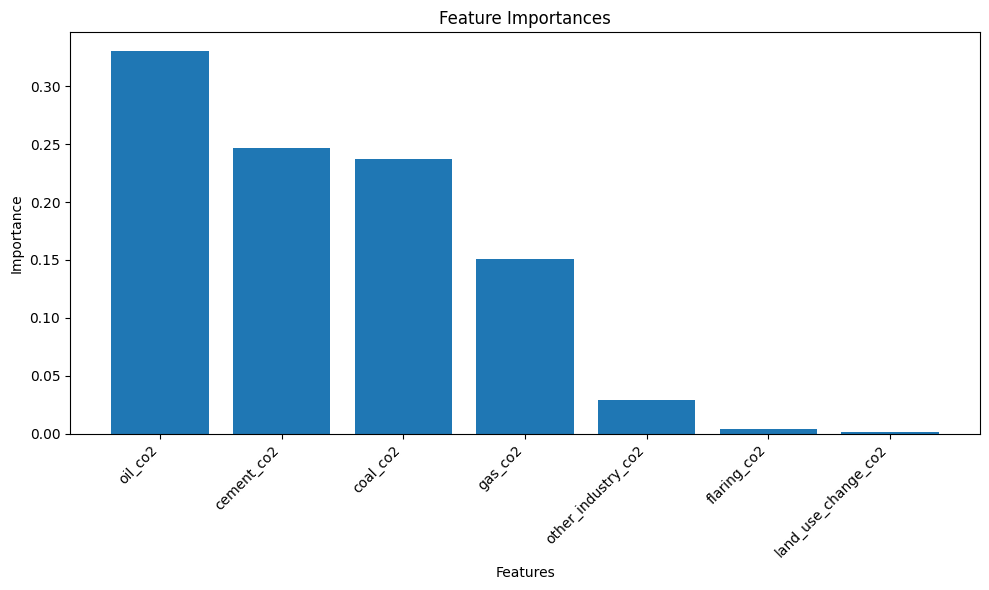

In [18]:
import matplotlib.pyplot as plt

# Features-dataframe

importance_values = feature_importances['importance']
features = feature_importances.index

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

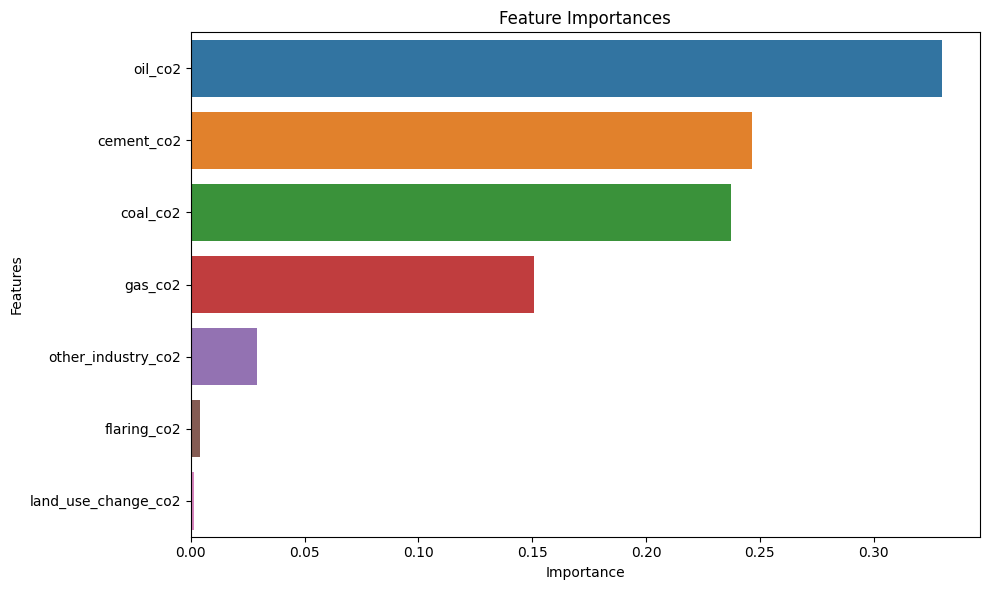

In [19]:
import seaborn as sns


# Plotting using the dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_values, y=features, orient='h')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [20]:
# This is an outlier plot 

def plotvariable(df, variable):
    plt.figure(figsize=(16, 4))
    # Histogram 
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha=0.5)

    # Boxplot 
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show

In [21]:
#plotvariable(df, 'cement_co2')

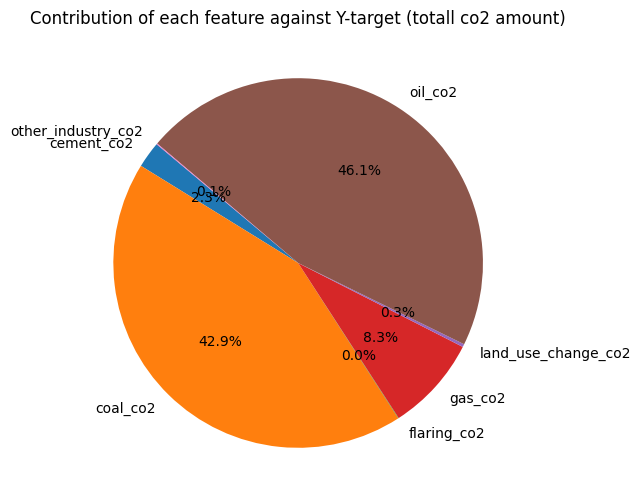

In [22]:
contributions = (X_test * regr.feature_importances_).sum()

df_contributions = pd.DataFrame({'Features': contributions.index, 'Contribution': contributions.values})

# cirkeldiagram
plt.figure(figsize=(6, 6))
plt.pie(contributions, labels=contributions.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of each feature against Y-target (totall co2 amount)')
plt.show()

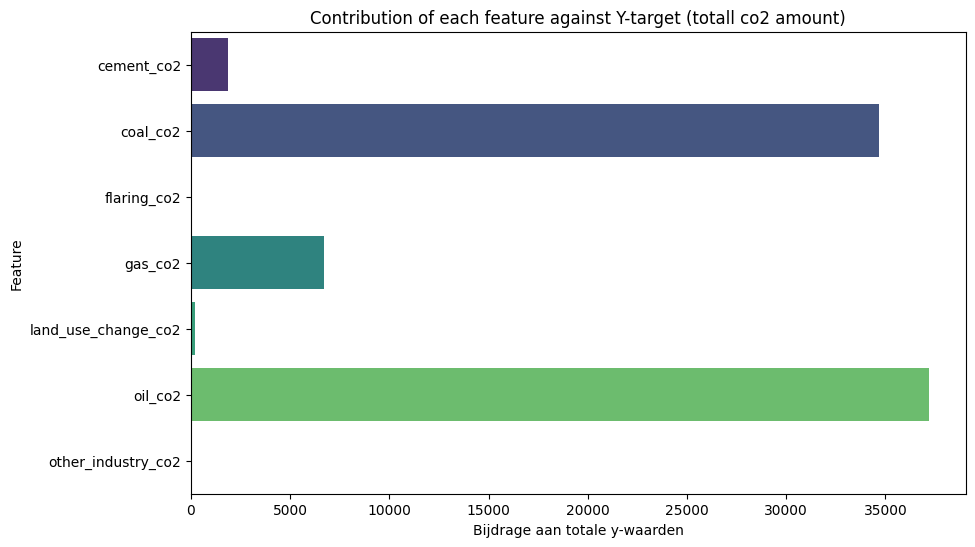

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contribution', y='Features', data=df_contributions, palette='viridis')
plt.xlabel('Bijdrage aan totale y-waarden')
plt.ylabel('Feature')
plt.title('Contribution of each feature against Y-target (totall co2 amount)')
plt.show()

NameError: name 'MonthLocator' is not defined

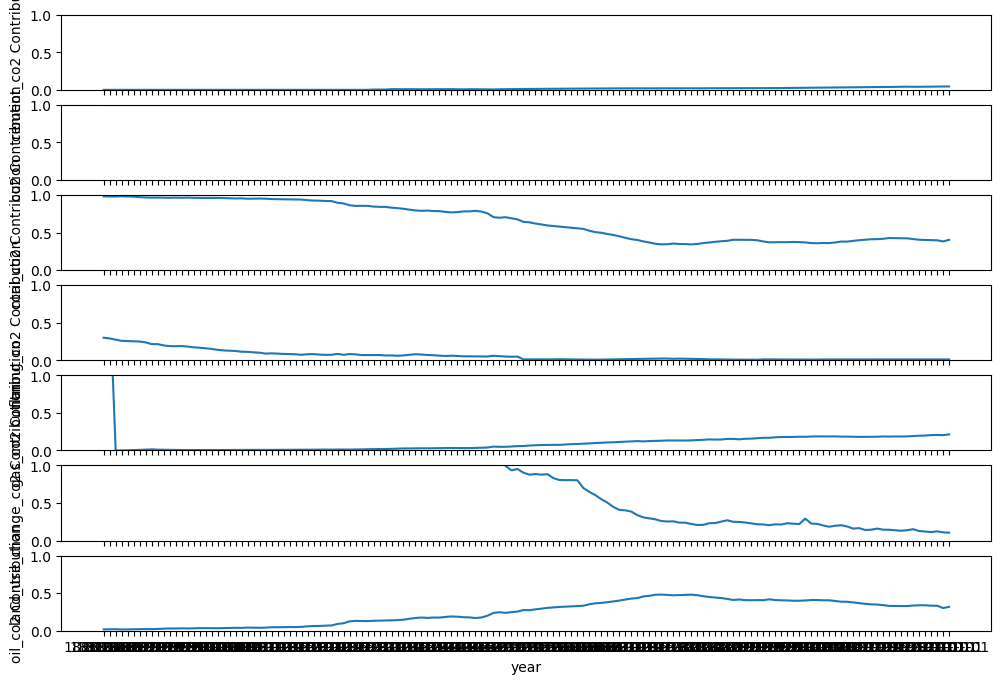

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate contributions for each time step
contributions = df.div(df['co2'], axis=0)

# Create subplots for each feature
fig, axes = plt.subplots(len(df.columns)-1, 1, figsize=(12, 8), sharex=True)

# Plot each feature against the Y feature over time
for i, col in enumerate(df.columns[:-1]):  # Exclude 'total_co2' from plotting
    sns.lineplot(x=df.index, y=contributions[col], ax=axes[i])
    axes[i].set_ylabel(col + ' Contribution')
    axes[i].set_ylim(0, 1)  # Set y-axis limit from 0 to 1 for contributions

    # Customize x-axis labels with quarterly intervals
    if i == len(df.columns) - 2:  # Only set x-axis label for the last subplot
        locator = MonthLocator(bymonth=[1, 4, 7, 10], bymonthday=1)  # Quarterly interval (Jan, Apr, Jul, Oct)
        date_format = DateFormatter("%b %Y")  # Format the dates as 'Month Year'
        axes[i].xaxis.set_major_locator(locator)
        axes[i].xaxis.set_major_formatter(date_format)
        plt.xlabel('Time')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()
